<a href="https://colab.research.google.com/github/kindachamma1/ComputerVision2025/blob/Exam/Exam_KindaChamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COMPUTER VISION - EXAM**

Kinda Chamma

In [5]:
from skimage import data, measure
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np


**1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.**

<ipython-input-6-3b5321202aad>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-6-3b5321202aad>:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


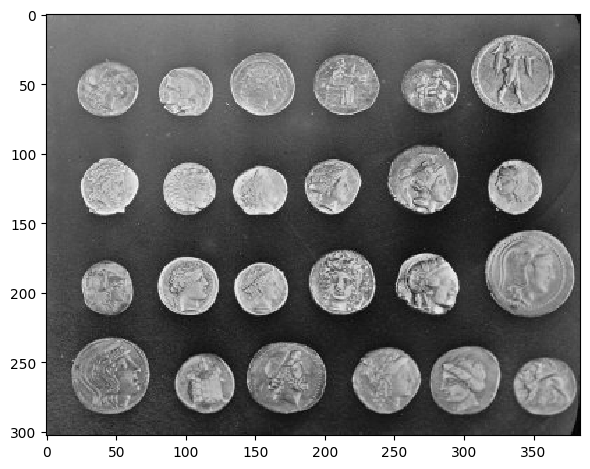

(303, 384)

In [6]:
IC = sk.data.coins()
sk.io.imshow(IC)
sk.io.show()
IC.shape



---


**Observation**: The IC.shape gives the size of the image in pixels. It is composed of 3 parts : ( # col, # rows, # channels).

Here, we have the number of channels that doesn't show, which means that is is by default 1, so this image is in grey scale.

The size of the image can be seen based on the number of rows and columns.


---



**2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.**

252


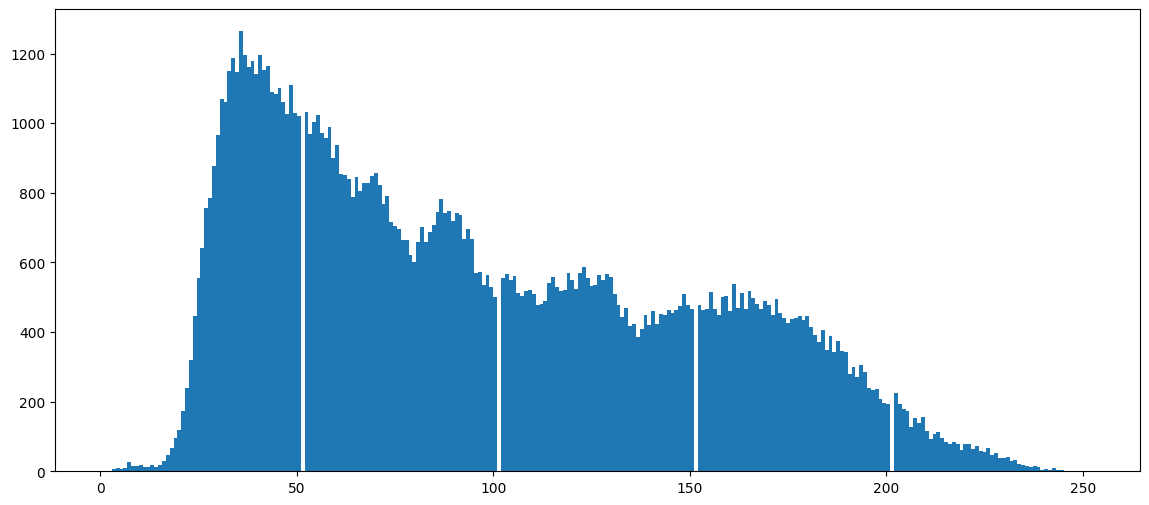

In [8]:
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

# Convert image to unsigned bytes format, with values in [0,255]
IGB = img_as_ubyte(IC)

# Reshape the uint8 image as 1d array:
v = IC.reshape(IGB.shape[0]*IGB.shape[1],1)
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()




---


**Observation**: By definition, the histogram gives a view on the quality of the image. An image is considered to be perfect if we have a perfect bell shape. This would mean that number of white pixels is equal to the number of black pixels.

For this image, we notice that the histogram is far from being balanced.

We have clear un-even distribution of pixels, with zones like 50, 100, 150, 200 with probability 0.

The probability of values all grayscale levels is not equal making this shape of the histogram.

A good strategy would be to try to pre process the image to enhance its quality before using it to segement and classify.



---



**3. Applied noise to the image and use the correct function to erase the noise.**



---

There are different types of noise that can be added, such as the gaussian noise, salt and pepper noise etc.

In order to erase the noise, we can use filters.

The Gaussian filter is famous because it is able to reduce the noise of an image.

I will use the Gaussian noise, and erase it using the gaussian filter.

---



GAUSSIAN FILTER WITH SIGMA: 


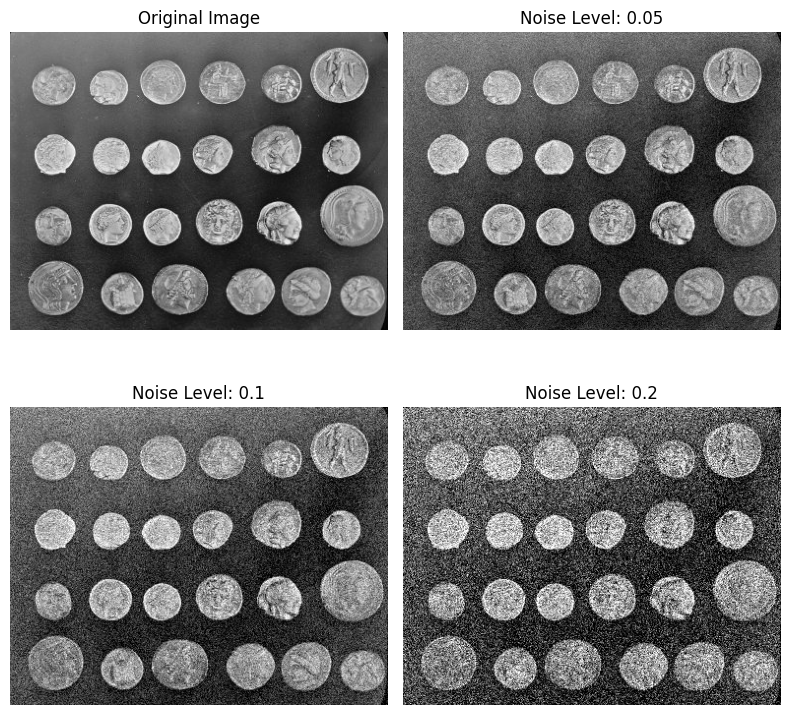

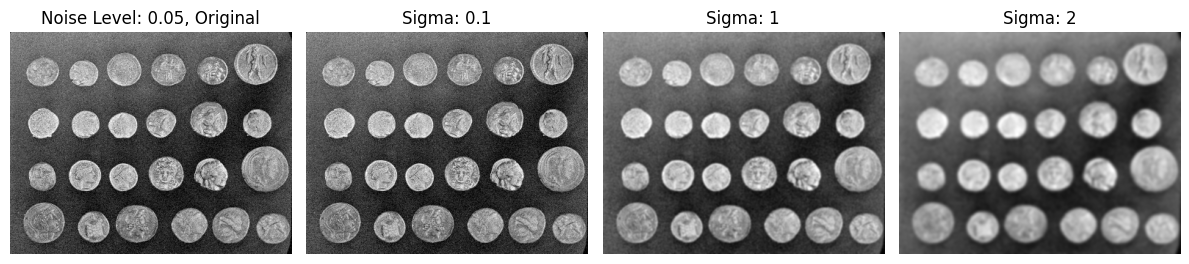

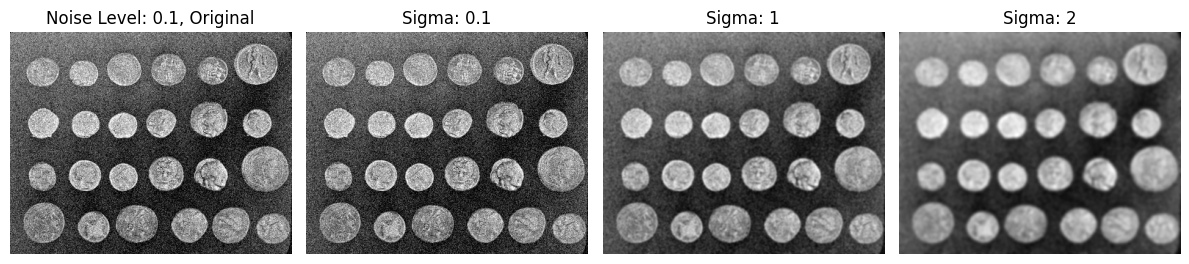

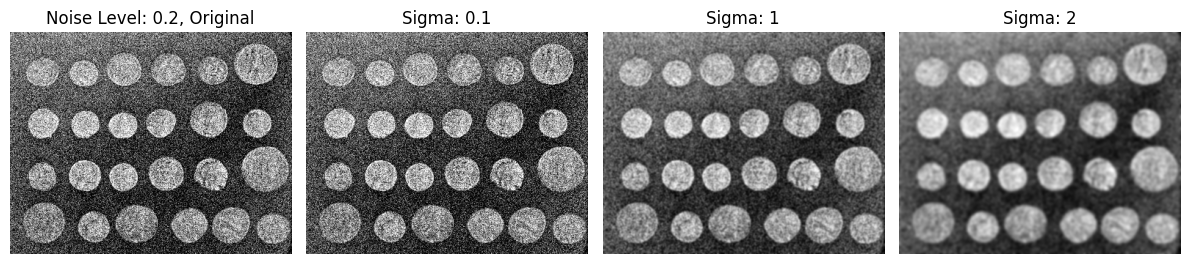

In [14]:
from skimage.util import random_noise
from skimage.filters import gaussian


# --------- PART 1 : Apply the Gaussian Noise  --------- #

# Import the image again for testing purposes
coins = data.coins()
noise_type = 'gaussian'
noise_levels = [0.05, 0.1, 0.2]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, noise_level in enumerate(noise_levels):
    # Add noise to the image using the specified mode
    noisy_image = random_noise(coins, mode=noise_type, var=noise_level**2)

    # Updated row and column calculation
    row = (i + 1) // 2
    col = (i + 1) % 2

    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Level: {noise_level}')
    axes[row, col].axis('off')

plt.tight_layout()

# --------- PART 2 : Apply the Gaussian Filter with Sigma  --------- #

sigma_values = [0.1, 1, 2]

for i, noise_level in enumerate(noise_levels):
    noisy_image = random_noise(coins, mode=noise_type, var=noise_level**2)
    fig, axes = plt.subplots(1, len(sigma_values) + 1, figsize=(12, 4))
    axes[0].imshow(noisy_image, cmap='gray')
    axes[0].set_title(f'Noise Level: {noise_level}, Original')
    axes[0].axis('off')

    for j, sigma in enumerate(sigma_values):
        filtered_image = gaussian(noisy_image, sigma=sigma)
        axes[j + 1].imshow(filtered_image, cmap='gray')
        axes[j + 1].set_title(f'Sigma: {sigma}')
        axes[j + 1].axis('off')

    plt.tight_layout()




---


**Observation**:  

NOTE  : All the conclusions about the visibility in this part are based on the human eye, not the result of pixels that we can see only using the histogram.


*Case 1 -noise level=0.05:* We notice that with this noise level, the gaussian filter with sigma=0.1 is enough, as we manage to see the image clearly again. The more we incrase sigma, the more we lose details of the image and it becomes blurry.


*Case 2 -noise level=0.1:* We notice that with this noise level, the gaussian filter with sigma 1 is the best out of the three, even tho the noise isn't completely reduce ; it is only reduced.

*Case 3 -noise level=0.2::* We notice that with this noise level, none of the gaussian filters is good, as either we have still some noise, or the image is very blurred.


Thus, we can conclude that as sigma increases, the Gaussian filter becomes more blurred, smoothing out the noise, but also potentienaly losing fine details in the image.


---



**4. Segment the image using a k-means clustering algorithm with k=2 and represent the result**

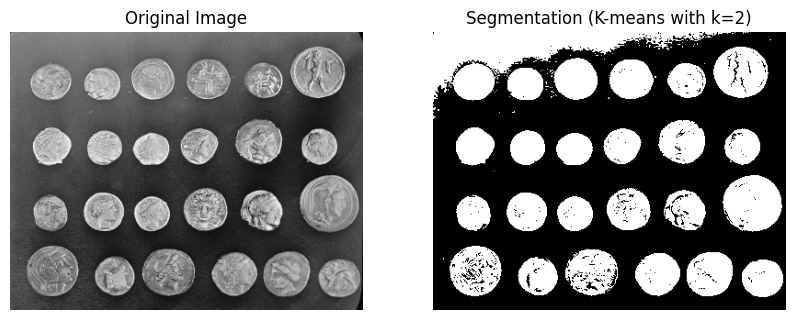

In [15]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# 2. K-means
# Reshape the image into (N_PIXELS, N_FEATURES) for clustering
v_I = np.reshape(IC, (-1, 1))  # shape: (303*384, 1)

# Fit KMeans with 2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict cluster assignments for each pixel
v_kmeans = kmeans.predict(v_I)

# Reshape clustered labels back to original image shape
I_kmeans = np.reshape(v_kmeans, IC.shape)

# 3. Visualization
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.axis('off')

plt.show()



---

**Observation**: Based on the theory, we know that K-means clustering algorithm groups pixels based on their color similarity. The quality of the segmentation depends on the choise of the number of clusters.

In this case, we have k=2. We have a  white space in the upper left. A filter should be used to mitigate this issue.

I assume that this goes to the fact that K-means doesn't work very well with images that have illumination variations or noise.

---



**5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?**

In order to be able to label the coins, we need to apply a thresholding method beforehand. I decided to apply the labeling after applying Otsu's threshold to gamma corrected image.

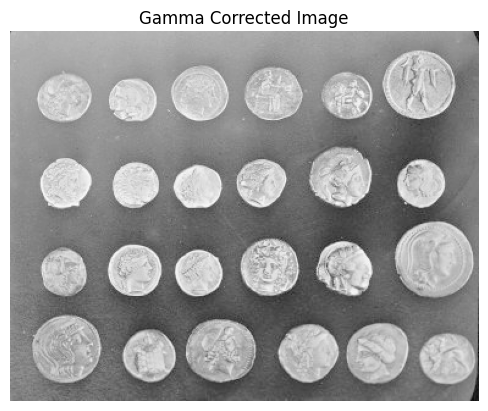

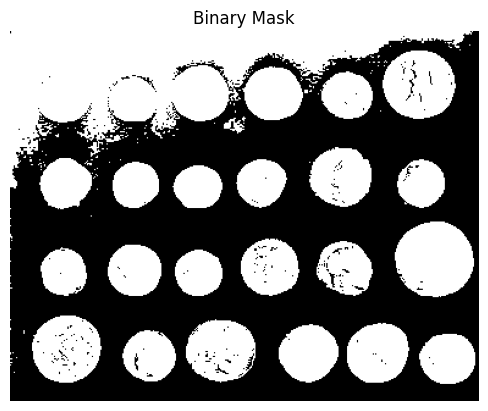

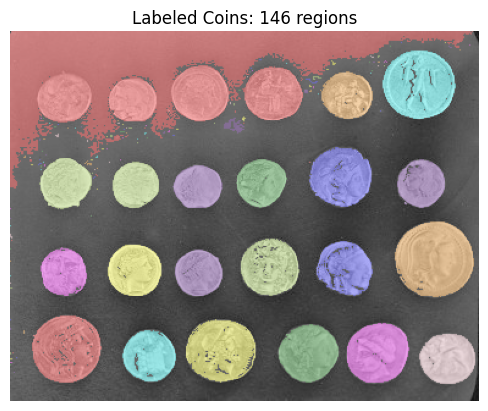

In [24]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# 1. Gamma correction (gamma < 1 to brighten)
IGC = exposure.adjust_gamma(IC, 0.5)

plt.figure()
plt.title("Gamma Corrected Image")
plt.imshow(IGC, cmap='gray')
plt.axis('off')

# 2. Apply Otsu's threshold on gamma-corrected image
thresh = threshold_otsu(IGC)

# 3. Binarize: keep lighter regions (intensity > threshold)
bw = IGC > thresh
plt.figure()
plt.title("Binary Mask")
plt.imshow(bw, cmap='gray')
plt.axis('off')

# 4. Label connected components
label_image, nregions = label(bw, return_num=True)

# 5. Color the labels
colored_labels = label2rgb(label_image, image=IGC, bg_label=0)

plt.figure()
plt.title(f"Labeled Coins: {nregions} regions")
plt.imshow(colored_labels)
plt.axis('off')
plt.show()





---

**Observation**: We notice that the labelling isn't correct. I believe that this goes to the fact that we have still illumination variations and noise in the image. These factors can lead to poor thresholding results, where coins may be partially segmented or missed entirely. Uneven lighting can cause Otsu's method to misclassify background as foreground and vice versa, while noise can introduce small, irrelevant regions that interfere with accurate labeling. Preprocessing steps like morphological filters can help mitigate these issues and improve the accuracy of segmentation.

---

